# Week 5 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. This week, we ask you to articulate what your sample represents in context of your final project, and draw upon methods we have developed over the last three weeks to draw reasonable and representative samples. 

This week we also pivot from our recent work on unsupervized machine learning approaches to explore how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in the two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

My final project partner: Dongping Zhang (CNet/Github ID: dpzhang)

## ***What?*** 
<200 words

We plan to analyze all film plot summaries that are available in the IMDb film archives before, during, and after major U.S. economic downturns - those time periods such as the Great Depression during the 1930s and the Great Recession in 2008. We are interested in the plot summaries of films with top box office during these three different periods of times, so as to model and detect how does movie goers change their tastes of films before, during, and after the crisis.

## ***Why?***
<200 words

The modeling and detection of changes in consumer preferences have been a long-lasting topic in economics. By borrowing some concepts from economics, this project could provide some insights into both economics and film study. Practically, our model and study on the film industry during the economic downturn could also be applied to other entertainment industries or mass media, so these businesses would be able to acquire a better marketing sense of what product or service to offer during varying economic conditions. Lastly, this study could potentially generate policy implications so as to assist the government to better subsidize certain industries and to adjust and remedy market expectations during economic downturns.

## ***How?***
<400 words

We have acquired text data of plot summaries from IMDb film archives and have built a database of films in order to assist identifications of popular tastes before, during, and after economic downturns within and between genres. 

We would first identify relatively popular and unpopular films during each period according to box office record. After the identification, we intend to compute distributional distances and to construct Doc2Vec models to compare the overall differences of films within and between genres before, during, and after the crisis.

Clustering techniques, such as K-means flat clustering or hierarchical clustering, and topic modeling together with machine classification would be applied to categorize films into different categories and to interpret the differences of categories before, during, and after the crisis. Such operations would be implemented to films both within genres as well as between genres. Within each category or genre, we will compute word frequency distributions and conditional word frequency distributions and identify significant collocations, to infer the semantics of each category within and between genres.

We would also train Word2Vec and Doc2Vec models within and between categories and/or genres and study projections in certain semantic dimensions. We are interested to explore the difference of depictions of certain dimensions in different categories or genres before, during, and after the crisis.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<300 words).

## ***Which (words)?***
<300 words

In our project, we intend to study all film plot summaries that are available in the IMDb film archives before, during, and after major U.S. economic downturns. Because IMDb archive contains all film data since 1894, our body of text is a set of comprehensive film plot summaries, thus a census. Because our data is complete and manageable, we have no need to expand the amount of text by snowballing, neither do we need to reduce data size by random sampling. 

In our study, we seek to make inferences on movie-goers because U.S. has one of the largest film industry in the world having significant socioeconomic and cultural influences to the U.S. society and, at the same time, movie-going is recognized to be one of major popular leisure activities. Thus, we believe we are able to detect, model, and identify preferences of the society at different times by studying most popular or least popular films with great accuracy. 

Our research design does have potential flaws and bias. Our choice of text is movie plot summary instead of actual movie script. Plot summary has far less details and information than those carried by actual movie scripts, so our result could potentially be biased. However, consider the number of films we have in our database, quantity could potentially compensate quality. Regardless, we do think it would be wonderful if the same study could be conducted on actual movie scripts, generating better and more insightful results. However, the unsurmountable task of acquiring complete and accurate movie scripts is too good to be true. Nevertheless, if the corpus of comprehensive U.S. movie scripts that is similar to our plot summary corpus is available, we strongly believe it could be scaled up and prepare for high-profile publication.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

My corpus is the plot summaries of films from IMDB film archives.

One approach to create subsamples of my corpus is to use flat or hierarchical clustering techniques to cluster my corpus and by interrogating the plots in each cluster, we can understand and assign a category to each cluster. For example, in week 3’s homework, I found one of the clusters trained by flat clustering method was composed of Tim Burton’s Batman films, so I can assign the tag “Batman films” to this cluster.

The second approach is using topic modeling to infer the main topic of each plot described by the top words in each topic. For example, in week 3’s homework, one topic generated by machine has the top words “thief”, “kill”, “die” that are mostly different from other topics. Thus, I could assign a tag “films about crime” to this topic.

The third approach is using word-embedding techniques. We can assign certain tags to plots and by comparing a plot with a bulk of plots of certain tag, we could get the most possible tag this plot should be assigned to. For example, in week 4’s homework, I assigned 8 tags by occurrence of words to the plots and compared each plot with the bulk of plots of certain tags. I found that though the plot of movie “Becoming Blond” contained none of the keywords I have assigned, it is most similar to the group of “affair” films, thus, it could be categorized as “affair” films.

# Example Annotation Dataset

Load Rzhetsky et al (2009)'s sample dataset, which can be found [here](https://github.com/enthought/uchicago-pyanno/tree/master/data). This data is the result of a content analytic / content extraction study in which Andrey Rzhetsky and colleagues from the National Library of Medicine, published [here](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000391) in [PLOS Computational Biology](http://journals.plos.org/ploscompbiol/), gave eight annotators 10,000 sentence chunks from biomedical text in biomedical abstracts and articles, then asked them, in a loop design schematically illustrated below that provided 3 independent codings for each document. The sampling strategy pursued diversity by drawing from PubMed abstracts (1000) and full-text articles (9000: 20% from abstracts, 10% from introductions, 20% from methods, 25% from results, and 25% from discussions.) The dataset extract here involves respondents codes for sentences in terms of their *Evidence*: {0, 1, 2, 3, -1} where 0 is the complete lack of evidence, 3 is direct evidence present within the sentence, and -1 is didn't respond. (They also crowdsourced and analyzed *polarity*, *certainty*, and *number*). For example, consider the following two abutting sentence chunks: *"Because null mutations in toxR and toxT abolish CT and TcpA expression in the El Tor biotype and also attenuate virulence..."* [i.e., average certainty = 0], *"...it is likely that the ToxR regulon has functional similarities between the two biotypes despite the clear differences in the inducing parameters observed in vitro"* [i.e., average certainty = 1]."

In [2]:
x = np.loadtxt("../data/pyAnno/testdata_numerical.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

Interrogate the AnnotationsContainer object.

In [25]:
anno.annotations

array([[ 1,  2,  3, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 2,  2,  1, ..., -1, -1, -1],
       ...,
       [ 2,  2, -1, ..., -1, -1,  1],
       [ 2,  2, -1, ..., -1, -1,  3],
       [ 1,  1, -1, ..., -1, -1,  0]])

In [4]:
anno.labels

[1.0, 2.0, 3.0, 4.0]

In [5]:
anno.missing_values

[-1]

# Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Two measures are primarily used for this: Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$ which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [23]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.11666667, 0.245     , 0.34083333, 0.2975    ])

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

[[ 8.  7.  3.  2.]
 [ 9. 30. 13.  3.]
 [ 2.  9. 42. 11.]
 [ 1.  7. 14. 39.]]


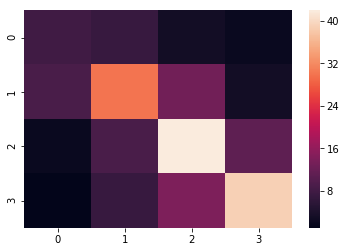

In [7]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [8]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.4386478265891502

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [9]:
fleiss_kappa(anno.annotations[::])

0.40417653771912765

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [10]:
krippendorffs_alpha(anno.annotations[::])

0.6472588223831547

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [11]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.43917037219392857

In [12]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.43917037 0.47677621        nan        nan        nan
  0.45819119 0.43381462]
 [0.43917037 1.         0.38432922 0.41344423        nan        nan
         nan 0.33643611]
 [0.47677621 0.38432922 1.         0.39583333 0.51704894        nan
         nan        nan]
 [       nan 0.41344423 0.39583333 1.         0.34597068 0.4446844
         nan        nan]
 [       nan        nan 0.51704894 0.34597068 1.         0.37938644
  0.43039733        nan]
 [       nan        nan        nan 0.4446844  0.37938644 1.
  0.38341929 0.31214748]
 [0.45819119        nan        nan        nan 0.43039733 0.38341929
  1.         0.394806  ]
 [0.43381462 0.33643611        nan        nan        nan 0.31214748
  0.394806   1.        ]]


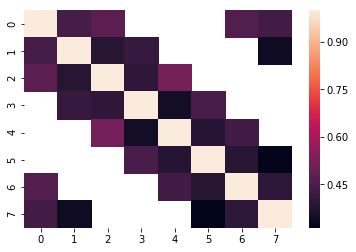

In [13]:
ax = seaborn.heatmap(m)
plt.show()

You can see that this 8 by 3 loop design will be less stable than an 8 choose 3 combinatorial design, because each codes with more others. 

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [14]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.40911598940065674

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [15]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5330240507874497

Or averaged over the total:

In [16]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.5299113458717166

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

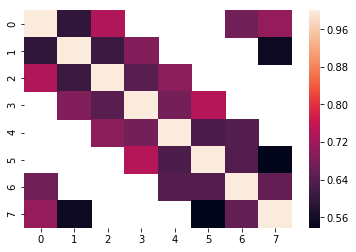

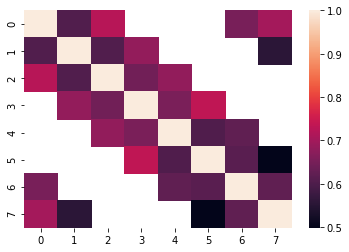

In [17]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

Or averaged over all comparable pairs:

In [18]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.6517219321175077 0.63808488688039


## <span style="color:red">*Excercise 2*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides on this week's Canvas page.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

I distributed a MTurk survey asking people to allocate a drama type to drama film plots. The workers are presented with 50 plot summaries of films tagged as Drama from IMDB and are asked to decide the most likely type including Social Problem Dramas, Race Relations and Civil Rights Dramas, Courtroom Dramas, Political Dramas, Journalism, the Press and Media-Related Dramas, WWII Homefront Dramas, of each plot summary. Four people have responded to my survey.

In [81]:
plot_x = np.loadtxt("MTurkRes.txt")
plot_anno = AnnotationsContainer.from_array(plot_x, missing_values = None)

Let's take a look at the frequency of codes:

In [82]:
pyanno.measures.agreement.labels_frequency(plot_anno.annotations, 6)

array([0.28 , 0.375, 0.095, 0.11 , 0.07 , 0.07 ])

In [84]:
plot_anno.annotations[:,0]

array([1, 2, 2, 2, 2, 3, 4, 1, 5, 4, 1, 1, 3, 0, 5, 1, 0, 1, 3, 0, 1, 4,
       1, 3, 2, 1, 1, 1, 0, 5, 0, 0, 5, 0, 1, 4, 1, 0, 0, 2, 0, 0, 0, 3,
       0, 1, 1, 1, 3, 0])

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

[[10.  4.  0.  0.  0.  0.]
 [ 2. 14.  0.  0.  0.  0.]
 [ 3.  1.  2.  0.  0.  0.]
 [ 0.  1.  0.  5.  0.  0.]
 [ 1.  1.  0.  0.  2.  0.]
 [ 1.  0.  0.  0.  0.  3.]]


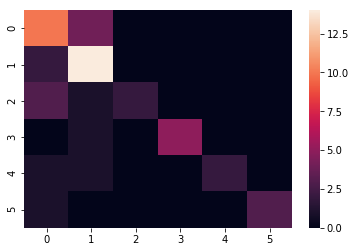

In [86]:
plot_c = pyanno.measures.agreement.confusion_matrix(plot_anno.annotations[:,0], plot_anno.annotations[:,1], 6)
print(plot_c)
plot_ac = seaborn.heatmap(plot_c)
plt.show()

[[ 9.  5.  0.  0.  0.  0.]
 [ 2. 12.  2.  0.  0.  0.]
 [ 0.  0.  5.  0.  1.  0.]
 [ 0.  1.  0.  5.  0.  0.]
 [ 0.  1.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  4.]]


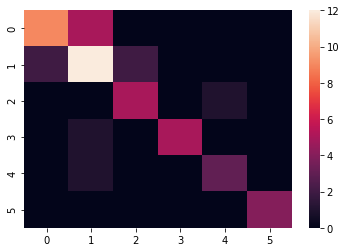

In [87]:
plot_c = pyanno.measures.agreement.confusion_matrix(plot_anno.annotations[:,0], plot_anno.annotations[:,2], 6)
print(plot_c)
plot_ac = seaborn.heatmap(plot_c)
plt.show()

[[12.  2.  0.  0.  0.  0.]
 [ 0. 16.  0.  0.  0.  0.]
 [ 2.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.]
 [ 0.  1.  0.  0.  0.  3.]]


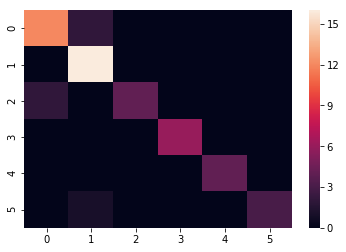

In [88]:
plot_c = pyanno.measures.agreement.confusion_matrix(plot_anno.annotations[:,0], plot_anno.annotations[:,3], 6)
print(plot_c)
plot_ac = seaborn.heatmap(plot_c)
plt.show()

[[ 6.  5.  4.  0.  1.  1.]
 [ 5. 12.  1.  1.  2.  0.]
 [ 0.  0.  2.  0.  0.  0.]
 [ 0.  1.  0.  4.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  3.]]


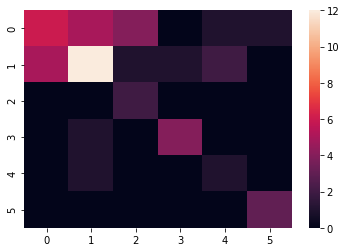

In [102]:
plot_c = pyanno.measures.agreement.confusion_matrix(plot_anno.annotations[:,1], plot_anno.annotations[:,2], 6)
print(plot_c)
plot_ac = seaborn.heatmap(plot_c)
plt.show()

[[11.  3.  1.  0.  1.  1.]
 [ 3. 15.  1.  1.  1.  0.]
 [ 0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  5.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.]
 [ 0.  1.  0.  0.  0.  2.]]


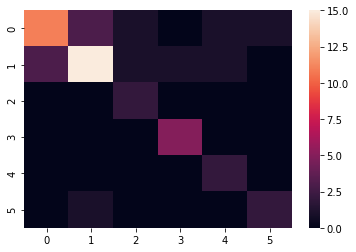

In [103]:
plot_c = pyanno.measures.agreement.confusion_matrix(plot_anno.annotations[:,1], plot_anno.annotations[:,3], 6)
print(plot_c)
plot_ac = seaborn.heatmap(plot_c)
plt.show()

[[ 8.  3.  0.  0.  0.  0.]
 [ 4. 13.  0.  1.  1.  0.]
 [ 2.  2.  3.  0.  0.  0.]
 [ 0.  0.  0.  5.  0.  0.]
 [ 0.  0.  1.  0.  3.  0.]
 [ 0.  1.  0.  0.  0.  3.]]


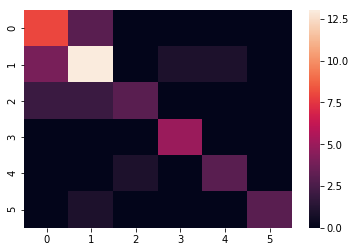

In [104]:
plot_c = pyanno.measures.agreement.confusion_matrix(plot_anno.annotations[:,2], plot_anno.annotations[:,3], 6)
print(plot_c)
plot_ac = seaborn.heatmap(plot_c)
plt.show()

Let's compute Scott's $\pi$ between any two coders:

In [90]:
scotts_pi(plot_anno.annotations[:,0], plot_anno.annotations[:,1])

0.6216216216216216

In [91]:
scotts_pi(plot_anno.annotations[:,0], plot_anno.annotations[:,2])

0.6896016554578375

In [92]:
scotts_pi(plot_anno.annotations[:,0], plot_anno.annotations[:,3])

0.8690070736180245

In [105]:
scotts_pi(plot_anno.annotations[:,1], plot_anno.annotations[:,2])

0.40136054421768713

In [106]:
scotts_pi(plot_anno.annotations[:,1], plot_anno.annotations[:,3])

0.6393897364771153

In [107]:
scotts_pi(plot_anno.annotations[:,2], plot_anno.annotations[:,3])

0.6040126715945092

Then let's generalize Scott's $\pi$ to n coders by Fleiss' $\kappa$:

In [93]:
fleiss_kappa(plot_anno.annotations[::])

0.6400239984001068

Let's compute Cohen's $\kappa$ between any two coders:

In [97]:
cohens_kappa(plot_anno.annotations[:,0], plot_anno.annotations[:,1])

0.6244635193133047

In [98]:
cohens_kappa(plot_anno.annotations[:,0], plot_anno.annotations[:,2])

0.6904024767801856

In [99]:
cohens_kappa(plot_anno.annotations[:,0], plot_anno.annotations[:,3])

0.869246861924686

In [108]:
cohens_kappa(plot_anno.annotations[:,1], plot_anno.annotations[:,2])

0.4070080862533693

In [110]:
cohens_kappa(plot_anno.annotations[:,1], plot_anno.annotations[:,3])

0.6404867256637169

In [111]:
cohens_kappa(plot_anno.annotations[:,2], plot_anno.annotations[:,3])

0.6050552922590839

[[1.         0.62446352 0.69040248 0.86924686]
 [0.62446352 1.         0.40700809 0.64048673]
 [0.69040248 0.40700809 1.         0.60505529]
 [0.86924686 0.64048673 0.60505529 1.        ]]


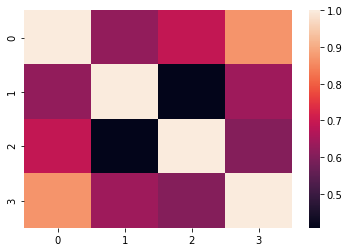

In [100]:
plot_m = pairwise_matrix(cohens_kappa, plot_anno.annotations)
print(plot_m)
plot_ax = seaborn.heatmap(plot_m)
plt.show()

The let's assess the average Cohen's  $\kappa$  for all pairs of coders:

In [101]:
pairwise_metric_average(cohens_kappa, plot_anno.annotations)

0.639443827032391

Since Krippendorff's $\alpha$ and Weighted Cohen's $\kappa$ apply to ordinal annotations, and Pearson's $\rho$ and Spearman's $\rho$ apply to real values, they are not appplicable in my case.

After the above metrics calculation and visualization, we can see that overall the coders have done the survey carefully and allocated similar annotations to each plot (Fleiss' $\kappa$ = 0.64 and average Cohen's $\kappa$ = 0.64), thus, it is doable to use human assessments to decide the sub-genres of films by plot summaries.

However, by analyzing the Scott’s $\pi$ and Cohen's $\kappa$ between any two coders, we can see that coder 0 and coder 3 have given the most similar answers while coder 1 and coder 2 have given the most different answers. The confusion matrixes between any two coders suggest that most coders agree on the annotation of class 0 and 1, and less consistent on the annotations of class 2 to 5. Even the coders 0 and 3 who have given the most similar answers give quite different answers on class 2 to 5. The coder 1 and 2 get the lowest Scott’s $\pi$ and Cohen's $\kappa$ because coder 1 has assigned many plots that coder 2 considers as class 0 to 2 as class 0 and plots that coder 2 considers as class 0 to 1 as class 0. It would be helpful to have more coders to increase the realiability of the annotation.

# Models

However, what if some coders are better than others. The prior measures all rely on the assumption that all coders are equally good. What if some are worse than others? Now we use Rzhetsky et al (2009) and Dawid & Skene's models to make inference about true label classes by downweighting bad or deviant coders. Pyanno provides two relevant models: ModelB and ModelBt. Model B with $\theta$s models the relationship between each coder and code. Model B is a Bayesian generalization of the Dawid & Skene model from the reading. The following image schematically describes these models. <img src="../data/pyanno/Bmodel.png">

The models should provide very similar results. To estimate the parameters for any models, we first need to create a new model. 

In [26]:
# create a new instance of model B, with 4 label classes
model = ModelB.create_initial_state(4,8)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.72486187 0.07394104 0.17242331 0.02877378]
  [0.07201124 0.73864428 0.13917146 0.05017302]
  [0.1719273  0.10470414 0.66594214 0.05742642]
  [0.04393857 0.03512403 0.19368048 0.72725693]]

 [[0.57937131 0.25844259 0.15336152 0.00882458]
  [0.15178902 0.60727438 0.15230942 0.08862717]
  [0.16347361 0.17449484 0.51109154 0.15094001]
  [0.10238718 0.11905286 0.27417183 0.50438813]]

 [[0.77682057 0.11268721 0.07328816 0.03720406]
  [0.22954331 0.60018473 0.09377307 0.07649889]
  [0.11724995 0.11113255 0.70299238 0.06862513]
  [0.07091089 0.08529308 0.1117741  0.73202192]]

 [[0.71432743 0.17566775 0.07551839 0.03448643]
  [0.11561561 0.72372461 0.08791675 0.07274303]
  [0.08141419 0.18262143 0.55921767 0.17674671]
  [0.0350651  0.06187627 0.24405265 0.65900599]]

 [[0.552935   0.28588293 0.15329095 0.00789112]
  [0.20312609 0.60501827 0.16884099 0.02301465]
  [0.08551675 0.1873187  0.51382016 0.21334439]
  [0.02596076 0.29379755 0.12058257 0.55965912]]

 [[0.63745227 0.22538038 0.119

Now we train the model on our data. Pyanno allows one to use either MAP (maximum a posteriori estimation) or MLE (maximum likelihood estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator-annotation pair. First we will train with MAP, and then you can optionally training with MLE.

In [27]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [28]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.73398728e-01 2.01020245e-01 2.55810269e-02 1.20101219e-26]
  [1.47832659e-01 7.11503767e-01 7.66499157e-02 6.40136580e-02]
  [1.97431020e-02 1.48708709e-01 6.96639326e-01 1.34908863e-01]
  [2.52463780e-18 2.13647377e-02 8.51550428e-02 8.93480220e-01]]

 [[7.19395465e-01 2.01828761e-01 7.87757734e-02 1.55486964e-13]
  [1.33941799e-01 7.07223261e-01 1.10418200e-01 4.84167403e-02]
  [2.72093282e-02 1.65178369e-01 6.71232700e-01 1.36379603e-01]
  [2.15358721e-30 5.38211823e-02 1.21871740e-01 8.24307077e-01]]

 [[8.50073137e-01 1.22955501e-01 2.69713621e-02 3.64395738e-42]
  [8.93514251e-02 7.89280333e-01 8.93429608e-02 3.20252811e-02]
  [6.11638366e-02 1.29121422e-01 7.03992731e-01 1.05722011e-01]
  [6.53666390e-03 5.12606512e-02 2.10869595e-01 7.31333090e-01]]

 [[6.99612801e-01 2.70976969e-01 2.94102301e-02 8.57899704e-52]
  [9.67171336e-02 7.62615701e-01 1.09523823e-01 3.11433425e-02]
  [1.81150586e-02 1.45472330e-01 6.85587954e-01 1.50824657e-01]
  [2.71897111e-47 2.98511124e-02 2

Uncomment the cell below if you would rather train by MLE.

In [29]:
#model = ModelB.create_initial_state(4,8)
#model.mle(anno.annotations)
#print(model.theta)
#print(model.log_likelihood(anno.annotations))

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [30]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[1.20741380e-42 1.00240780e-01 7.90821679e-01 1.08937540e-01]
 [9.92682453e-01 7.07056554e-03 2.46981317e-04 2.03944498e-49]
 [1.07420297e-03 5.51435353e-02 9.37476514e-01 6.30574822e-03]
 ...
 [8.15378491e-04 3.51193436e-02 9.59859130e-01 4.20614824e-03]
 [1.34481992e-44 2.14447325e-03 9.16166870e-01 8.16886569e-02]
 [2.14745550e-01 7.69057353e-01 1.61970966e-02 2.01807019e-26]]


Let's turn the posterior of the first 20 samples into a heatmap and compare with the raw vote tallies.

In [31]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x113ca5710>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x113fc95c0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x114579ef0>))

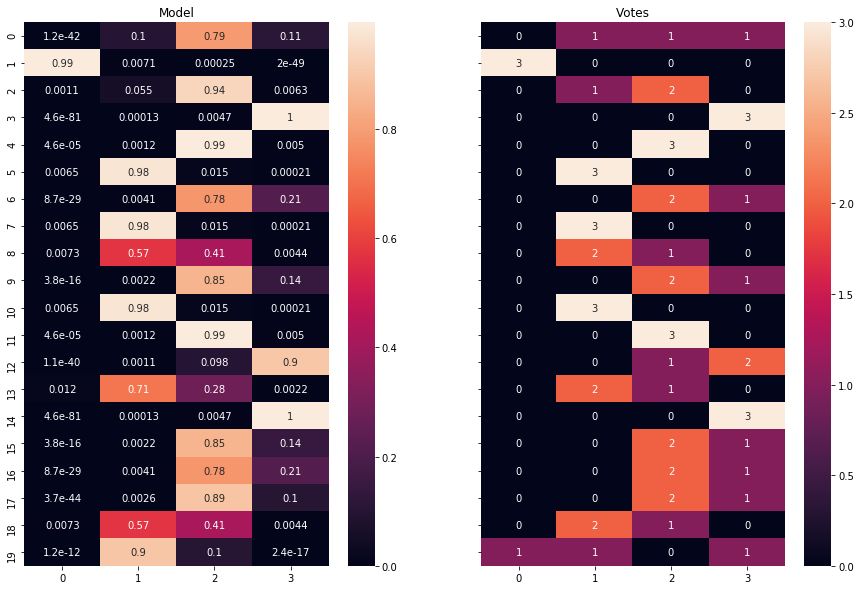

In [32]:
makeQuestionComparison(model, anno)

This differs markedly from taking annotator scores at face value. As you can see (the model-based probabilities are on left; the raw votes on right), the models helps us break ties between coders and in some cases dramatically downgrades the estimates from particularly bad coders.

Let's try everything again with ModelBt, which constrains ModelB so that each coder has a single estimate over the accuracy of all of their codes.

In [33]:
# create a new instance of model B, with 4 label classes and 8 annotators.
model = ModelBt.create_initial_state(4, 8)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.80857357 0.72358821 0.92582613 0.92146177 0.80022858 0.65608912
 0.82722751 0.67199056]
-3078.9396206302686


In [34]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.79133674 0.74078213 0.7622423  0.72523976 0.71640682 0.71864905
 0.77321899 0.71661455]
-2811.9463643249965


In [35]:
model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

array([[0.74395989, 0.79470992, 0.76224336, ..., 0.7691688 , 0.74147277,
        0.74638113],
       [0.75947579, 0.75932434, 0.7542015 , ..., 0.73853376, 0.77011085,
        0.69503218],
       [0.75947579, 0.75932434, 0.7542015 , ..., 0.73853376, 0.77011085,
        0.69503218],
       ...,
       [0.73922682, 0.80661587, 0.72441891, ..., 0.69279814, 0.7404709 ,
        0.7089874 ],
       [0.75245532, 0.78706143, 0.72092688, ..., 0.72433037, 0.7281901 ,
        0.76486629],
       [0.76191544, 0.80263099, 0.75021583, ..., 0.68372353, 0.78603477,
        0.74903296]])

In [36]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[0.01110129 0.28932887 0.36500143 0.33456842]
 [0.99022644 0.00241798 0.00404805 0.00330753]
 [0.0024985  0.05504791 0.9346245  0.00782909]
 ...
 [0.00252789 0.04393089 0.94562002 0.0079212 ]
 [0.00249292 0.0057107  0.93253542 0.05926097]
 [0.03187555 0.93884428 0.01611398 0.01316619]]


Let's visualize the posterior of the first 20 samples according to ModelBt.

(<matplotlib.figure.Figure at 0x11483c208>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x11455d5c0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x114c47cc0>))

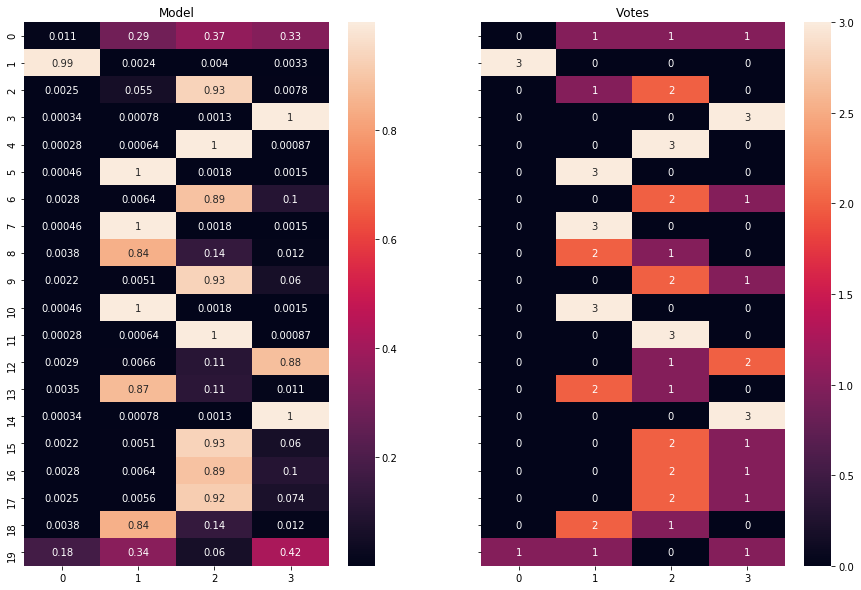

In [37]:
makeQuestionComparison(model, anno)

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. We may also use the posterior themselves rather than the most probably code outcome.

## Visualizing coder accuracy

Let's make a plot of the accuracy for each annotator inferred from ModelBt. This might be helpful if you wanted to ban a "troll" from your crowdsourcing enterprise. The coder a very low accuracy likelihood is an outlier and should be "dropped from the team."

In [38]:
model = ModelBt.create_initial_state(4,8)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

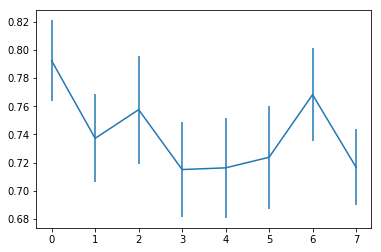

In [39]:
plt.figure()
plt.errorbar(range(8),y, yerr = y_ci)
plt.show()

# Hotel Reviews

If we want to do a simpler analysis we can look at a different data set, here are some hotel reviews from [expedia](https://www.kaggle.com/c/expedia-hotel-recommendations)

In [40]:
df_hotels = pandas.read_csv('../data/hot_Reviews.csv', index_col=0)
df_hotels[:5]

,Karen,Scott,Jessica,write a review,A verified traveler,Kevin,William,R,S,Christopher,...,Thomas,Susan,A Traveler,M,Not Provided,B,Laura,xxxxxxxxxxxxxx,Michael,Joseph
1785 Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900 House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bed & Breakfast In Cambridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Swallow's Nest Motel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbeville Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here a rank of 0 is a missing value and to simplify things more we will convert from a 1-10 scale to a 1-5 scale, with 0 as missing

In [41]:
df_hotels = df_hotels.apply(lambda x: x // 2) #integer divide by 2 rounds all values

And we can visualize all the reviews as a heatmap with the missing values greyed out

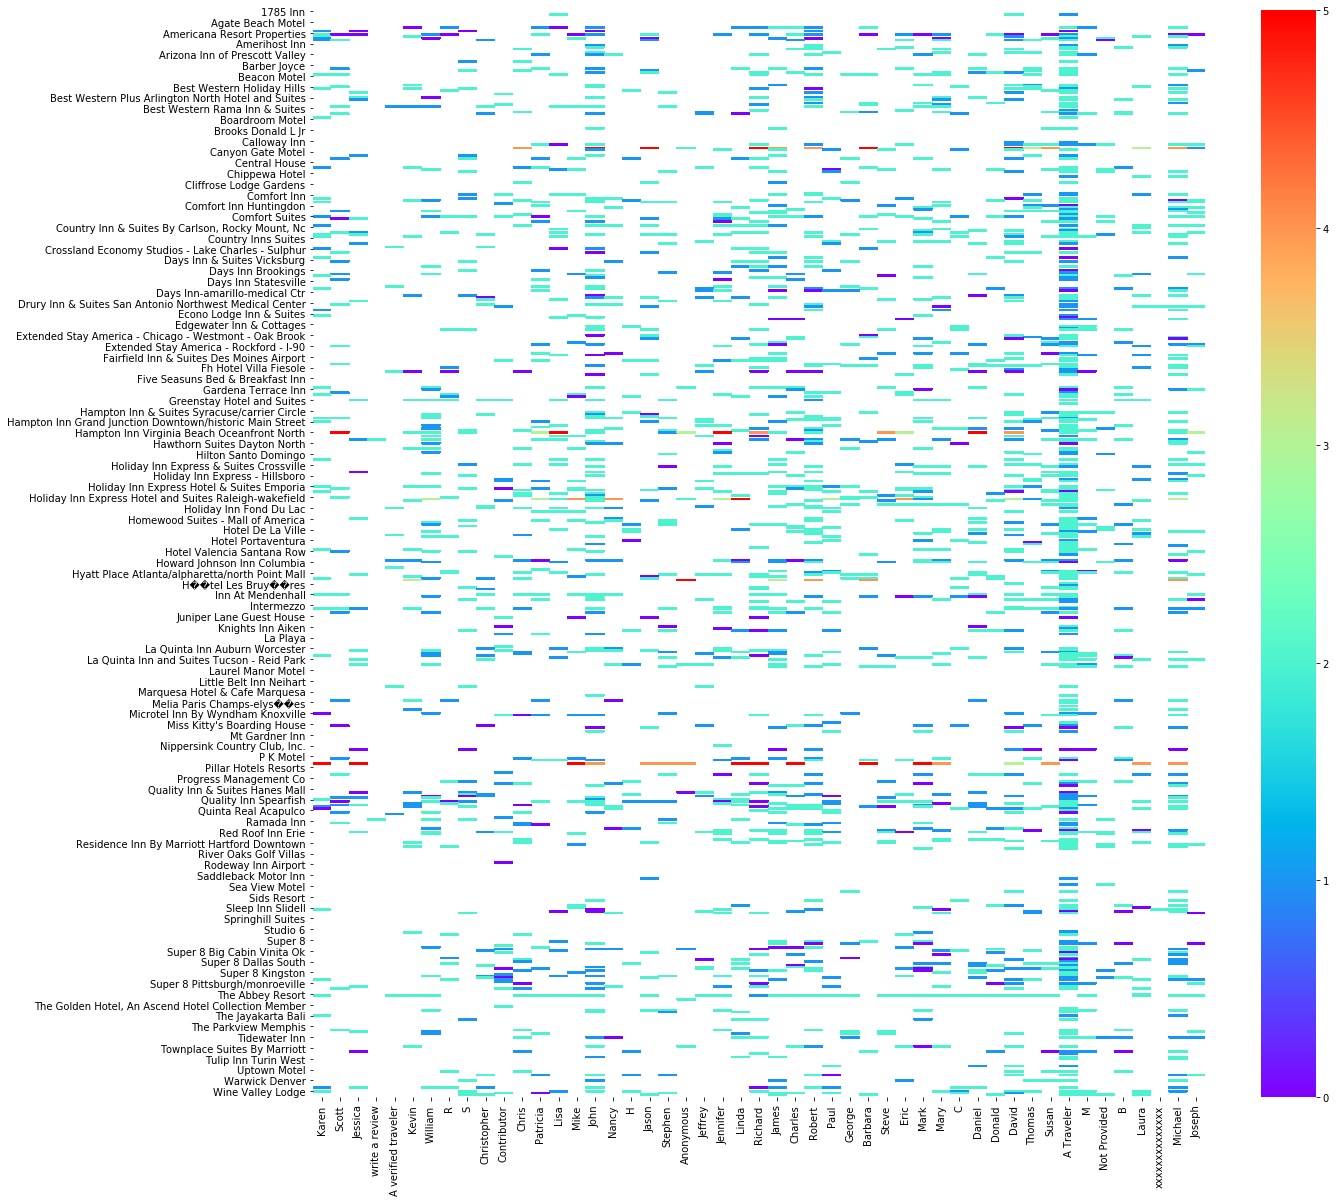

In [42]:
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

To give the dataframe to pyanno we need to convert to np array and change the nans to intergers, lets use -1

In [43]:
hot_mat = np.array(df_hotels.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [44]:
anno_hot.annotations

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [45]:
anno_hot.labels

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [46]:
anno_hot.missing_values

[-1]

Look at coder agreement

In [47]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 6)#6 possible catagories

array([0.07806534, 0.26262198, 0.63555367, 0.00636402, 0.0093339 ,
       0.00806109])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


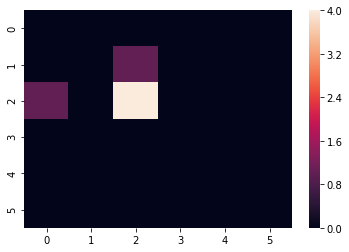

In [48]:
c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 6) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

Most agreement is on 2 i.e. an average hotel and there's little agreement as rating go higher, likely due to scarcity in the sample

In [49]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

0.3787878787878787

In [50]:
krippendorffs_alpha(anno_hot.annotations[::])

0.398760907615921

In [51]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

0.40328336902212697

/Users/yiqingzhu/anaconda/lib/python3.5/site-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


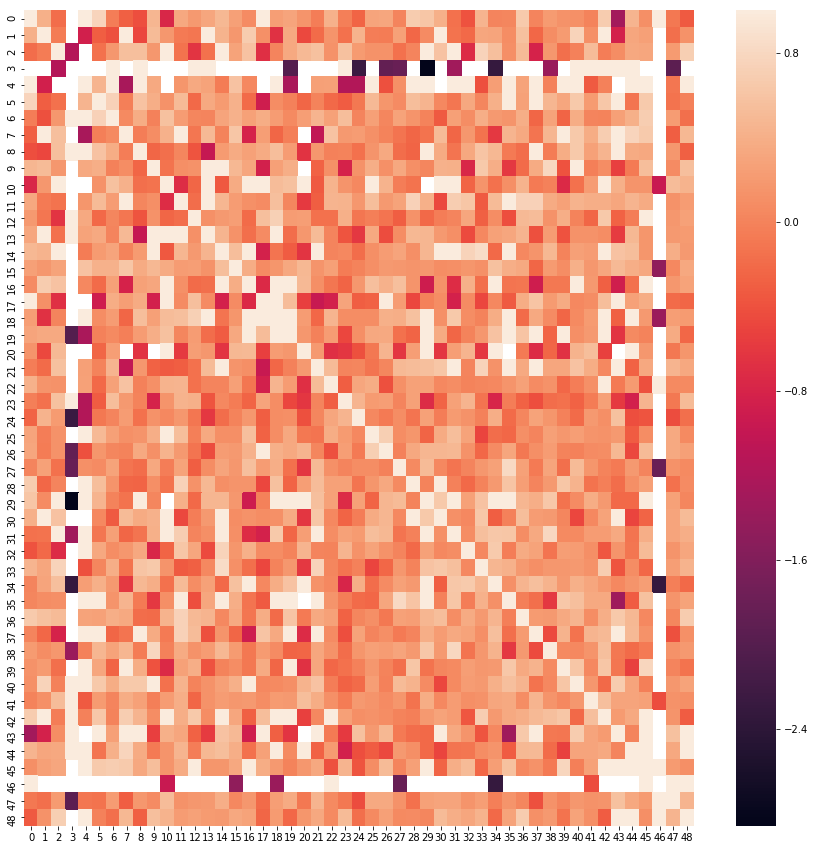

In [52]:
m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

And to look at what model Bt thinks the correct reviews are:

In [53]:
model_hot = ModelBt.create_initial_state(6, 49)
model_hot.mle(anno_hot.annotations)
#print(model.theta)
print(model_hot.log_likelihood(anno_hot.annotations))

-2712.261700969974


(<matplotlib.figure.Figure at 0x116d41278>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x116f950b8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x116ff5240>))

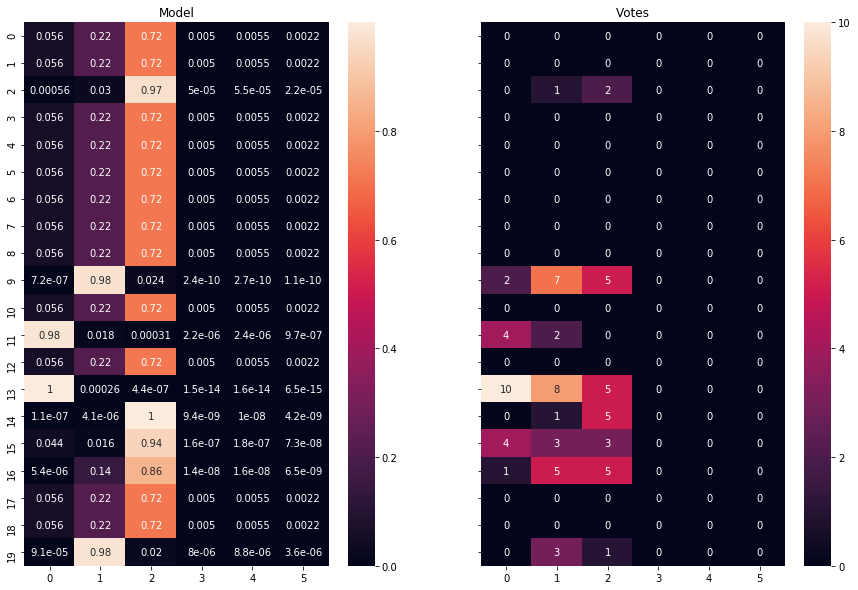

In [54]:
makeQuestionComparison(model_hot, anno_hot)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MLE or MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

Let's first use Model B to predict high and low-quality analysts and estimates for my codes after downgrading the estimates from particularly bad coders.

In [113]:
# create a new instance of model B, with 6 label classes
plot_model = ModelB.create_initial_state(6, 4)
# other model parameters are initialized from the model prior
print(plot_model.theta)
print(plot_model.log_likelihood(plot_anno.annotations))

[[[4.22935104e-01 2.66450406e-01 1.28620113e-01 1.69682208e-02
   1.11104206e-01 5.39219502e-02]
  [1.38480700e-01 5.36437844e-01 2.23849677e-01 6.19944147e-02
   3.20909654e-02 7.14639838e-03]
  [3.56250719e-02 1.31910153e-01 6.26737097e-01 9.85730717e-02
   3.13603130e-02 7.57942934e-02]
  [1.45217966e-02 8.30850675e-02 2.84130861e-01 3.88694054e-01
   1.42517076e-01 8.70511452e-02]
  [4.63913419e-02 6.69655153e-02 1.05667076e-01 1.92578654e-01
   5.13933925e-01 7.44634873e-02]
  [2.02125167e-02 6.74378243e-03 1.21628478e-02 7.14930176e-02
   2.38962505e-01 6.50425331e-01]]

 [[5.85256811e-01 1.67248131e-01 7.35863498e-02 1.56706106e-02
   1.07914224e-03 1.57158955e-01]
  [4.50497822e-02 6.38709961e-01 1.31972658e-01 8.18753519e-02
   2.29351477e-02 7.94570993e-02]
  [1.02154050e-01 1.12389642e-01 5.93716727e-01 3.12963075e-02
   1.29817841e-01 3.06254324e-02]
  [4.57293647e-02 4.61946328e-02 7.03384709e-02 6.50413963e-01
   1.04845727e-01 8.24778424e-02]
  [3.46788714e-03 1.10102999

In [120]:
# train the model using MAP
plot_samples = plot_model.sample_posterior_over_accuracy(plot_anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [121]:
plot_model.map(plot_anno.annotations)
print(plot_model.theta)
print(plot_model.log_likelihood(plot_anno.annotations))

[[[8.25359978e-01 9.24307273e-02 8.22092947e-02 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.01123549e-01 7.94007795e-01 7.90463919e-02 2.58222650e-02
   0.00000000e+00 0.00000000e+00]
  [3.68844258e-02 1.11294259e-01 7.03938405e-01 1.10958708e-01
   3.69242021e-02 0.00000000e+00]
  [0.00000000e+00 3.44608806e-02 1.04160488e-01 7.22936616e-01
   1.03981521e-01 3.44604939e-02]
  [0.00000000e+00 0.00000000e+00 3.87582574e-02 1.15632426e-01
   7.30040573e-01 1.15568744e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.34711073e-02
   1.30760419e-01 8.25768474e-01]]

 [[7.80051702e-01 1.90540247e-01 2.94080512e-02 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [1.36945222e-01 7.59959001e-01 7.73107205e-02 2.57850565e-02
   0.00000000e+00 0.00000000e+00]
  [7.92720279e-02 1.46851514e-01 6.26254216e-01 1.10758031e-01
   3.68642102e-02 0.00000000e+00]
  [1.24101714e-38 6.96455245e-02 1.03427446e-01 6.88770702e-01
   1.03695833e-01 3.44604939e-02]
  [3.82926317e-02 3.84546784

/Users/yiqingzhu/anaconda/lib/python3.5/site-packages/pyanno/util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


In [122]:
plot_posterior = plot_model.infer_labels(plot_anno.annotations)
print(plot_posterior)

[[1.30150518e-03 9.98549886e-01 1.42732400e-04 5.87686462e-06
  0.00000000e+00 0.00000000e+00]
 [4.38137827e-37 2.23099825e-19 9.71585856e-01 2.12741160e-02
  7.14002832e-03 0.00000000e+00]
 [8.87084050e-01 2.55736189e-02 8.73423313e-02 0.00000000e+00
  7.22273073e-64 0.00000000e+00]
 [1.07353175e-04 1.20517558e-03 9.97857694e-01 8.19376413e-04
  1.04004397e-05 0.00000000e+00]
 [2.16869355e-02 1.62586184e-02 9.61975623e-01 7.48775436e-40
  7.88229350e-05 0.00000000e+00]
 [0.00000000e+00 4.99526219e-06 4.18493821e-04 9.99090332e-01
  4.76608287e-04 9.57052651e-06]
 [0.00000000e+00 0.00000000e+00 5.73035315e-04 1.48647885e-39
  9.92539497e-01 6.88746777e-03]
 [1.30150518e-03 9.98549886e-01 1.42732400e-04 5.87686462e-06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.27031986e-41
  2.52077016e-03 9.97479230e-01]
 [0.00000000e+00 0.00000000e+00 1.05506688e-03 8.29114115e-03
  9.90653792e-01 8.30274930e-39]
 [2.69243255e-03 9.92550371e-01 4.70902336e-03 4.8

(<matplotlib.figure.Figure at 0x118c716d8>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x115bf74e0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1188767b8>))

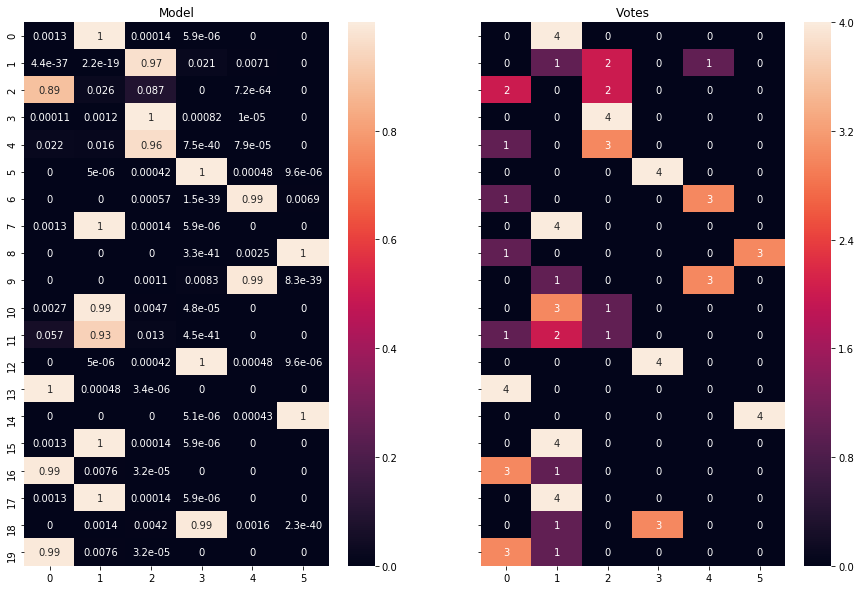

In [123]:
makeQuestionComparison(plot_model, plot_anno)

As we can see, the model-based probabilities have dramatically downgraded certain votes from bad coders and help provide a much more accurate estimate for each question.

Then let's try everything again with Model Bt, which constrains Model B so that each coder has a single estimate over the accuracy of all of their codes.

In [125]:
# create a new instance of model B, with 6 label classes and 4 annotators.
plot_model2 = ModelBt.create_initial_state(6, 4)
print(plot_model2.theta)
print(plot_model2.log_likelihood(plot_anno.annotations))

[0.65893178 0.6314104  0.67414487 0.64157399]
-235.25755630835258


In [131]:
plot_samples2 = plot_model2.sample_posterior_over_accuracy(plot_anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [132]:
plot_model2.map(plot_anno.annotations)
print(plot_model2.theta)
print(plot_model2.log_likelihood(plot_anno.annotations))

[0.93822933 0.76102823 0.7289692  0.96206557]
-204.43901467597732


In [133]:
plot_posterior2 = plot_model2.infer_labels(plot_anno.annotations)
print(plot_posterior2)

[[4.00666863e-07 9.99999092e-01 1.18403481e-07 1.67254654e-07
  1.11473438e-07 1.10526490e-07]
 [3.48359091e-04 6.71343846e-03 9.91393292e-01 1.45419261e-04
  1.30339380e-03 9.60970602e-05]
 [8.69144188e-01 5.20979015e-04 1.29916640e-01 1.79688931e-04
  1.19760750e-04 1.18743403e-04]
 [1.64094566e-06 1.98603955e-06 9.99994779e-01 6.84997500e-07
  4.56543505e-07 4.52665247e-07]
 [4.15852593e-04 3.16088673e-05 9.99527166e-01 1.09020967e-05
  7.26613078e-06 7.20440626e-06]
 [1.16166574e-06 1.40596618e-06 3.43290849e-07 9.99996445e-01
  3.23198362e-07 3.20452848e-07]
 [4.41691982e-04 3.35729138e-05 8.19740492e-06 1.15795086e-05
  9.99497306e-01 7.65205877e-06]
 [4.00666863e-07 9.99999092e-01 1.18403481e-07 1.67254654e-07
  1.11473438e-07 1.10526490e-07]
 [4.45474277e-04 3.38604052e-05 8.26760091e-06 1.16786662e-05
  7.78370608e-06 9.99492935e-01]
 [2.77368755e-05 5.34534082e-04 8.19669136e-06 1.15785006e-05
  9.99410302e-01 7.65139268e-06]
 [5.38803540e-06 9.99967965e-01 2.14127289e-05 2.2

(<matplotlib.figure.Figure at 0x117bb6d68>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x117d4b7f0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x117d7d2e8>))

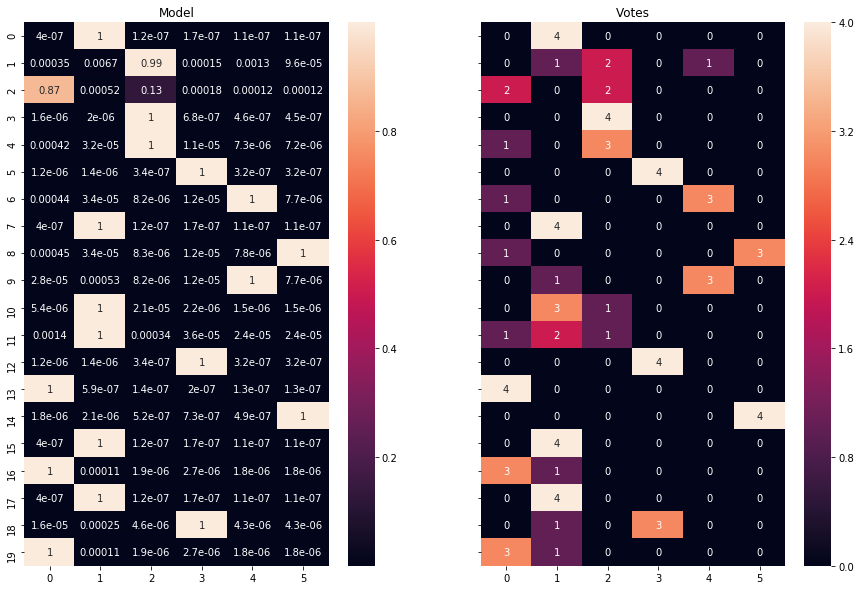

In [134]:
makeQuestionComparison(plot_model2, plot_anno)

The Model Bt has provided us a more accurate estimate for each question by downgrading certain bad voters. The difference between model-based code and vote-based code is larger than when using the Model Bt since Model Bt constrains Model B so that each coder has a single estimate over the accuracy of all of their codes.

However, generally speaking, most of the coders did a great job so most model-based codes agree with the vote-based codes. We can visualize the coder accuracy to identify the good and bad coders.

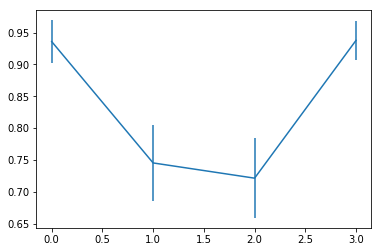

In [135]:
plot_y =  plot_samples2.mean(axis=0)
plot_y_ci = plot_samples2.std(axis=0)
plt.figure()
plt.errorbar(range(4), plot_y, yerr = plot_y_ci)
plt.show()

As we can see, both coder 1 and 2 have relatively low accuracy and are downgraded, which means that the skills of these four analysts are pretty different. This indicates that when I further analyze the codes from coders, I should have more coders and also evaluate each coder's accuracy before simply counting the majority of codes.